In [1]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('gmdc_df_dum.csv')

In [3]:
df.head()

,Star Client,Requested Loan Amount,Age,Monthly Income,Duration_Mod_Cre,Income Source_Benefits,Income Source_Job Employment,Income Source_Self Employed,Income Source_Unemployed,Loan Type_Installment,...,Created Time Braket_Afternoon,Created Time Braket_Evening,Created Time Braket_Morning,Created Time Braket_Night,State_Arm Force,State_Midwest,State_Northeast,State_Southeast,State_Southwest,State_West
0,0,500.0,56.000000,1000.0,1586:32:00,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,100.0,38.814992,1000.0,17351:23:00,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,500.0,58.000000,5000.0,563:34:00,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,400.0,28.000000,2500.0,764:22:00,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,400.0,44.000000,2000.0,1605:35:00,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [4]:
df.drop('Duration_Mod_Cre', axis=1, inplace=True)

In [5]:
df_normalized = df.loc[:,['Star Client', 'Requested Loan Amount', 'Age', 'Monthly  Income', 'Income Source_Benefits',
       'Income Source_Job Employment', 'Income Source_Self Employed',
       'Income Source_Unemployed', 'Loan Type_Installment', 'Loan Type_Payday',
       'Loan Type_Personal Loan', 'Credit Type_No sure',
       'Credit Type_excellent', 'Credit Type_fair', 'Credit Type_good',
       'Credit Type_poor', 'Car Owner_No', 'Car Owner_Yes',
       'Returning Client_No', 'Returning Client_Yes', 'Home Owner_No',
       'Home Owner_Yes', 'Armed forces_No', 'Armed forces_Yes',
       'Created DOW_Friday', 'Created DOW_Monday', 'Created DOW_Saturday',
       'Created DOW_Sunday', 'Created DOW_Thursday', 'Created DOW_Tuesday',
       'Created DOW_Wednesday', 'Created Time Braket_Afternoon',
       'Created Time Braket_Evening', 'Created Time Braket_Morning',
       'Created Time Braket_Night', 'State_Arm Force', 'State_Midwest',
       'State_Northeast', 'State_Southeast', 'State_Southwest', 'State_West']]

In [6]:
#Separate our features from our target

X = df_normalized.loc[:,['Requested Loan Amount', 'Age',
       'Monthly  Income', 'Income Source_Benefits',
       'Income Source_Job Employment', 'Income Source_Self Employed',
       'Income Source_Unemployed', 'Loan Type_Installment', 'Loan Type_Payday',
       'Loan Type_Personal Loan', 'Credit Type_No sure',
       'Credit Type_excellent', 'Credit Type_fair', 'Credit Type_good',
       'Credit Type_poor', 'Car Owner_No', 'Car Owner_Yes',
       'Returning Client_No', 'Returning Client_Yes', 'Home Owner_No',
       'Home Owner_Yes', 'Armed forces_No', 'Armed forces_Yes',
       'Created DOW_Friday', 'Created DOW_Monday', 'Created DOW_Saturday',
       'Created DOW_Sunday', 'Created DOW_Thursday', 'Created DOW_Tuesday',
       'Created DOW_Wednesday', 'Created Time Braket_Afternoon',
       'Created Time Braket_Evening', 'Created Time Braket_Morning',
       'Created Time Braket_Night', 'State_Arm Force', 'State_Midwest',
       'State_Northeast', 'State_Southeast', 'State_Southwest', 'State_West']]

y = df_normalized['Star Client']

In [7]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

### Standard Scaling 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
#Training Data
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [10]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)

In [11]:
#Validation
X_tr_val = std.transform(X_val.values)

In [12]:
#Test
X_te = std.transform(X_test.values)

## Oversampling

In [13]:
import imblearn.over_sampling
from sklearn.metrics import f1_score, roc_auc_score

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_resample(X_tr, y_train)

lr = LogisticRegression(solver='liblinear') 
lr.fit(X_tr, y_train)

print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_val, lr.predict(X_tr_val)), roc_auc_score(y_val, lr.predict_proba(X_tr_val)[:,1]))) 

lr_os = LogisticRegression(solver='liblinear') 
lr_os.fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_val, lr_os.predict(X_tr_val)), roc_auc_score(y_val, lr_os.predict_proba(X_tr_val)[:,1])))

Simple Logistic Regression; Test F1: 0.000, Test AUC: 0.742
Logistic Regression on Oversampled Train Data; Test F1: 0.247, Test AUC: 0.746


0    0.78739
1    0.21261
Name: Star Client, dtype: float64


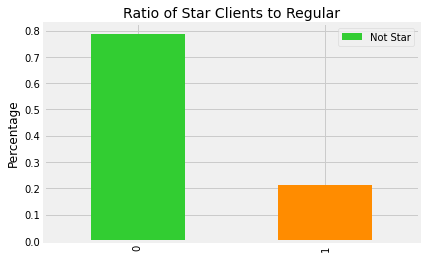

In [14]:
clients = y_tr_rs.value_counts(normalize=True) 
print(clients)

clients.plot(kind='bar', color=['limegreen', 'darkorange'], ylabel='Percentage');
plt.legend(['Not Star', 'Star'], loc="upper right");
plt.title('Ratio of Star Clients to Regular', fontdict = {'fontsize' : 14});

In [36]:
df_normalized['Star Client'].value_counts()

0    6105
1     405
Name: Star Client, dtype: int64

In [77]:
X_tr_rs.shape

(4647, 40)

In [78]:
y_tr_rs.shape

(4647,)

## SMOTE


In [15]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr, y_train)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_val, lr_smote.predict(X_tr_val)), roc_auc_score(y_val, lr_smote.predict_proba(X_tr_val)[:,1])))

Logistic Regression on SMOTE Train Data; Test F1: 0.226, Test AUC: 0.743


In [79]:
'''clients =  y_tr_smote.value_counts(normalize=True) 
print(clients)

clients.plot(kind='bar', color=['limegreen', 'darkorange'], ylabel='Percentage');
plt.legend(['Not Star', 'Star'], loc="upper right");
plt.title('Ratio of Star Clients to Regular', fontdict = {'fontsize' : 14});'''

'clients =  y_tr_smote.value_counts(normalize=True) \nprint(clients)\n\nclients.plot(kind=\'bar\', color=[\'limegreen\', \'darkorange\'], ylabel=\'Percentage\');\nplt.legend([\'Not Star\', \'Star\'], loc="upper right");\nplt.title(\'Ratio of Star Clients to Regular\', fontdict = {\'fontsize\' : 14});'

## Between Oversampling and SMOTE ---> Oversample

### KNN 
with oversampling parameteres 

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# initiate model and calculate error metrics
knn = KNeighborsClassifier()
knn.fit(X_tr_rs, y_tr_rs)
knn_pred = knn.predict(X_tr_val)
knn_confusion = confusion_matrix(y_val,knn_pred)

knn_ac = knn.score(X_tr_val, y_val)
knn_precision = precision_score(y_val, knn_pred)
knn_recall = recall_score(y_val, knn_pred)
knn_f1 = f1_score(y_val, knn_pred)

print(classification_report(y_val, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1228
           1       0.11      0.26      0.16        74

    accuracy                           0.84      1302
   macro avg       0.53      0.57      0.53      1302
weighted avg       0.90      0.84      0.87      1302



In [22]:
print('KNN validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (knn_ac, 
         knn_precision, 
         knn_recall,
         knn_f1)
     )

KNN validation metrics: 
 Accuracy: 0.8418 
 Precision: 0.1118 
 Recall: 0.2568 
 F1: 0.1557


In [23]:
knn_y_score = knn.predict_proba(X_tr_val)[:,1]
knn_fpr, knn_tpr, knn_auc_thresholds = roc_curve(y_val, knn_y_score)
roc_auc_knn = auc(knn_fpr, knn_tpr)
print(roc_auc_knn)

0.605153402588256


In [80]:
def make_confusion_matrix(model, threshold=0.50):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_tr_rs)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_tr_rs, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Regular', 'Star'],
           yticklabels=['Regular', 'Star']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

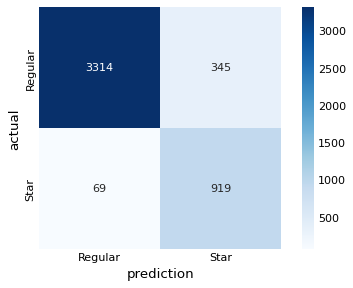

In [81]:
make_confusion_matrix(knn)

### Logistic Regression
with oversampling parameters

In [82]:
lr = LogisticRegression()
lr.fit(X_tr_rs, y_tr_rs)
lr_pred = lr.predict(X_tr_val)

lr_ac = lr.score(X_tr_val, y_val)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)

print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1228
           1       0.25      0.24      0.25        74

    accuracy                           0.92      1302
   macro avg       0.60      0.60      0.60      1302
weighted avg       0.91      0.92      0.91      1302



In [83]:
print('Logistic Regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1)
     )

Logistic Regression validation metrics: 
 Accuracy: 0.9155 
 Precision: 0.2500 
 Recall: 0.2432 
 F1: 0.2466


In [84]:
lr_y_score = lr.predict_proba(X_tr_val)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_val, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)
print(roc_auc_lr)

0.7455266748833523


In [85]:
'''#F2
# calculate the f2-measure
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# perfect precision, 50% recall
#y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
#y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
p = precision_score(y_val, lr_pred)
r = recall_score(y_val, lr_pred)
f = fbeta_score(y_val, lr_pred, beta=.1)
print('Result: p=%.3f, r=%.3f, f2=%.3f' % (p, r, f))'''

"#F2\n# calculate the f2-measure\nfrom sklearn.metrics import fbeta_score\nfrom sklearn.metrics import f1_score\nfrom sklearn.metrics import precision_score\nfrom sklearn.metrics import recall_score\n# perfect precision, 50% recall\n#y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]\n#y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]\np = precision_score(y_val, lr_pred)\nr = recall_score(y_val, lr_pred)\nf = fbeta_score(y_val, lr_pred, beta=.1)\nprint('Result: p=%.3f, r=%.3f, f2=%.3f' % (p, r, f))"

In [86]:
'''#from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
#precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm.predict_proba(X_te)[:,1] )

plt.figure(dpi=80)
plt.plot(lr_auc_thresholds, lr_tpr,label='precision')
plt.plot(lr_auc_thresholds, lr_fpr, label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');'''

"#from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score\n#precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm.predict_proba(X_te)[:,1] )\n\nplt.figure(dpi=80)\nplt.plot(lr_auc_thresholds, lr_tpr,label='precision')\nplt.plot(lr_auc_thresholds, lr_fpr, label='recall')\nplt.legend(loc='lower left')\nplt.xlabel('Threshold (above this probability, label as fraud)');\nplt.title('Precision and Recall Curves');"

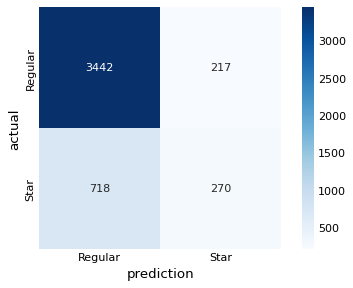

In [87]:
make_confusion_matrix(lr)

Feature: 0, Score: 0.07360
Feature: 1, Score: 0.21249
Feature: 2, Score: 0.00644
Feature: 3, Score: -0.37357
Feature: 4, Score: 0.34044
Feature: 5, Score: 0.20561
Feature: 6, Score: -0.45665
Feature: 7, Score: -0.24856
Feature: 8, Score: -0.26183
Feature: 9, Score: 0.48219
Feature: 10, Score: -0.03518
Feature: 11, Score: -0.18113
Feature: 12, Score: 0.12809
Feature: 13, Score: 0.01047
Feature: 14, Score: -0.06899
Feature: 15, Score: -0.07208
Feature: 16, Score: 0.07208
Feature: 17, Score: 0.27151
Feature: 18, Score: -0.27151
Feature: 19, Score: -0.03954
Feature: 20, Score: 0.03954
Feature: 21, Score: 0.03710
Feature: 22, Score: -0.03710
Feature: 23, Score: 0.05462
Feature: 24, Score: 0.06056
Feature: 25, Score: -0.07276
Feature: 26, Score: 0.04253
Feature: 27, Score: 0.08384
Feature: 28, Score: -0.12923
Feature: 29, Score: -0.04109
Feature: 30, Score: 0.06155
Feature: 31, Score: -0.00105
Feature: 32, Score: 0.08771
Feature: 33, Score: -0.22175
Feature: 34, Score: -0.15437
Feature: 35, 

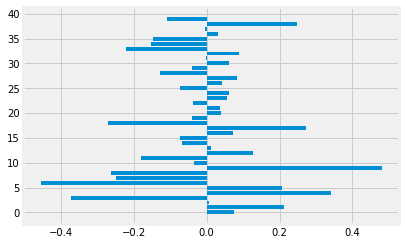

In [88]:
#logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model1 = LogisticRegression()
# fit the model
model1.fit(X_tr_rs, y_tr_rs)
# get importance
importance = model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()

In [89]:
importance_lst = list(importance)

In [90]:
feature_lst = list(X.columns)

In [91]:
df_fea_impor = pd.DataFrame(list(zip(feature_lst, importance_lst)))

In [92]:
df_fea_impor.columns = ['Features','Importance Coef']

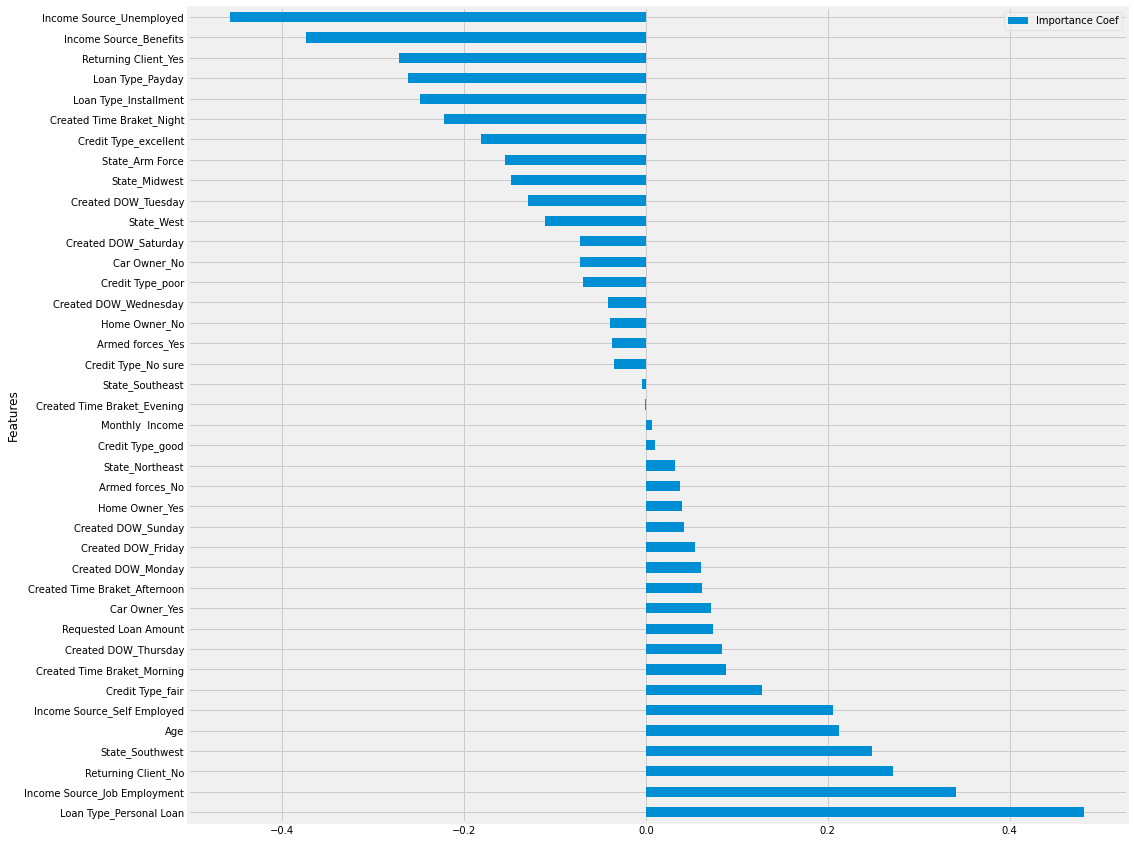

In [93]:
df1 = df_fea_impor.groupby('Features').mean().sort_values(['Importance Coef'],ascending=False).plot(kind='barh', figsize=(15,15))

In [94]:
#df_fea_impor.plot.barh(x='Features', y='Importance Coef',figsize=(10,10))

Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

No clear pattern of important and unimportant features can be identified from these results, at least from what I can tell.

## Decision Tree

In [95]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier()
dt.fit(X_tr_rs, y_tr_rs)
dt_pred = dt.predict(X_tr_val)

dt_ac = dt.score(X_tr_val, y_val)
dt_precision = precision_score(y_val, dt_pred)
dt_recall = recall_score(y_val, dt_pred)
dt_f1 = f1_score(y_val, dt_pred)

print(classification_report(y_val, dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1228
           1       0.12      0.15      0.13        74

    accuracy                           0.89      1302
   macro avg       0.54      0.54      0.54      1302
weighted avg       0.90      0.89      0.90      1302



In [96]:
print('Decision Tree validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (dt_ac, 
         dt_precision, 
         dt_recall,
         dt_f1)
     )

Decision Tree validation metrics: 
 Accuracy: 0.8909 
 Precision: 0.1222 
 Recall: 0.1486 
 F1: 0.1341


In [97]:
dt_y_score = dt.predict_proba(X_tr_val)[:, 1]
dt_fpr, dt_tpr, auc_thresholds = roc_curve(y_val, dt_y_score)
roc_auc_dt = auc(dt_fpr, dt_tpr)
print(roc_auc_dt)

0.5421582005458228


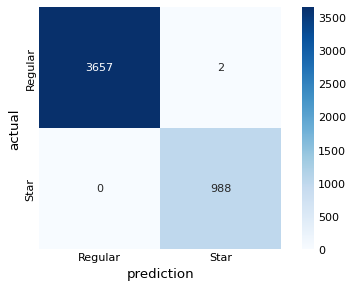

In [98]:
make_confusion_matrix(dt)

Feature: 0, Score: 0.11729
Feature: 1, Score: 0.15198
Feature: 2, Score: 0.17477
Feature: 3, Score: 0.02156
Feature: 4, Score: 0.00275
Feature: 5, Score: 0.01449
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00103
Feature: 8, Score: 0.01084
Feature: 9, Score: 0.09932
Feature: 10, Score: 0.01289
Feature: 11, Score: 0.00218
Feature: 12, Score: 0.02237
Feature: 13, Score: 0.01021
Feature: 14, Score: 0.01001
Feature: 15, Score: 0.00542
Feature: 16, Score: 0.00931
Feature: 17, Score: 0.02764
Feature: 18, Score: 0.00190
Feature: 19, Score: 0.01521
Feature: 20, Score: 0.00439
Feature: 21, Score: 0.00378
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01943
Feature: 24, Score: 0.01890
Feature: 25, Score: 0.01504
Feature: 26, Score: 0.02309
Feature: 27, Score: 0.02550
Feature: 28, Score: 0.00340
Feature: 29, Score: 0.01426
Feature: 30, Score: 0.02602
Feature: 31, Score: 0.02885
Feature: 32, Score: 0.01678
Feature: 33, Score: 0.01484
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.01463
Fe

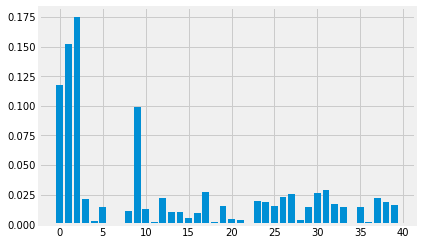

In [99]:
# decision tree for feature importance on a regression problem
#from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model2 = DecisionTreeRegressor()
# fit the model
model2.fit(X_tr_rs, y_tr_rs)
# get importance
importance = model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Forest

In [100]:
rf = RandomForestClassifier()
rf.fit(X_tr_rs, y_tr_rs)
rf_pred = rf.predict(X_tr_val)
rf_confusion = confusion_matrix(y_val, rf_pred)

rf_ac = rf.score(X_tr_val, y_val)
rf_precision = precision_score(y_val, rf_pred)
rf_recall = recall_score(y_val, rf_pred)
rf_f1 = f1_score(y_val, rf_pred)

print(classification_report(y_val, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1228
           1       0.18      0.03      0.05        74

    accuracy                           0.94      1302
   macro avg       0.56      0.51      0.51      1302
weighted avg       0.90      0.94      0.92      1302



In [101]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (rf_ac, 
         rf_precision, 
         rf_recall,
         rf_f1)
     )

Random Forest validation metrics: 
 Accuracy: 0.9378 
 Precision: 0.1818 
 Recall: 0.0270 
 F1: 0.0471


In [102]:
rf_y_score = rf.predict_proba(X_tr_val)[:, 1]
rf_fpr, rf_tpr, auc_thresholds = roc_curve(y_val, rf_y_score)
roc_auc_rf = auc(rf_fpr, rf_tpr)
print(roc_auc_rf)

0.7107689937494498


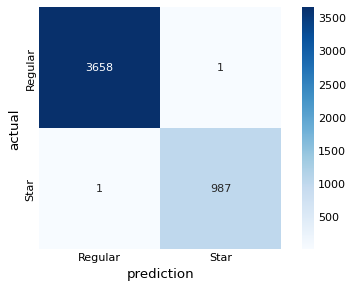

In [103]:
make_confusion_matrix(rf)

Feature: 0, Score: 0.12326
Feature: 1, Score: 0.16170
Feature: 2, Score: 0.17726
Feature: 3, Score: 0.01445
Feature: 4, Score: 0.01211
Feature: 5, Score: 0.00667
Feature: 6, Score: 0.00016
Feature: 7, Score: 0.00359
Feature: 8, Score: 0.00409
Feature: 9, Score: 0.09989
Feature: 10, Score: 0.01251
Feature: 11, Score: 0.00124
Feature: 12, Score: 0.02273
Feature: 13, Score: 0.00989
Feature: 14, Score: 0.01286
Feature: 15, Score: 0.01453
Feature: 16, Score: 0.01432
Feature: 17, Score: 0.01662
Feature: 18, Score: 0.01547
Feature: 19, Score: 0.00966
Feature: 20, Score: 0.00978
Feature: 21, Score: 0.00106
Feature: 22, Score: 0.00131
Feature: 23, Score: 0.01641
Feature: 24, Score: 0.01828
Feature: 25, Score: 0.01105
Feature: 26, Score: 0.01621
Feature: 27, Score: 0.02293
Feature: 28, Score: 0.01538
Feature: 29, Score: 0.01598
Feature: 30, Score: 0.01611
Feature: 31, Score: 0.01960
Feature: 32, Score: 0.01885
Feature: 33, Score: 0.00879
Feature: 34, Score: 0.00009
Feature: 35, Score: 0.01649
Fe

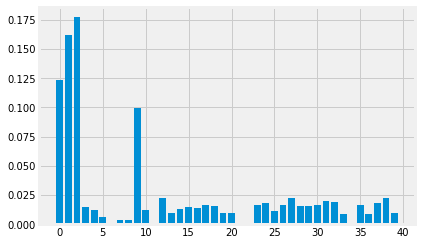

In [104]:
# random forest for feature importance on a regression problem
#from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_tr_rs, y_tr_rs)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [105]:
importance_lst = list(importance)
feature_lst = list(X.columns)

In [106]:
df_fea_impor_rf = pd.DataFrame(list(zip(feature_lst, importance_lst)))
df_fea_impor_rf.columns = ['Features','Importance Score']

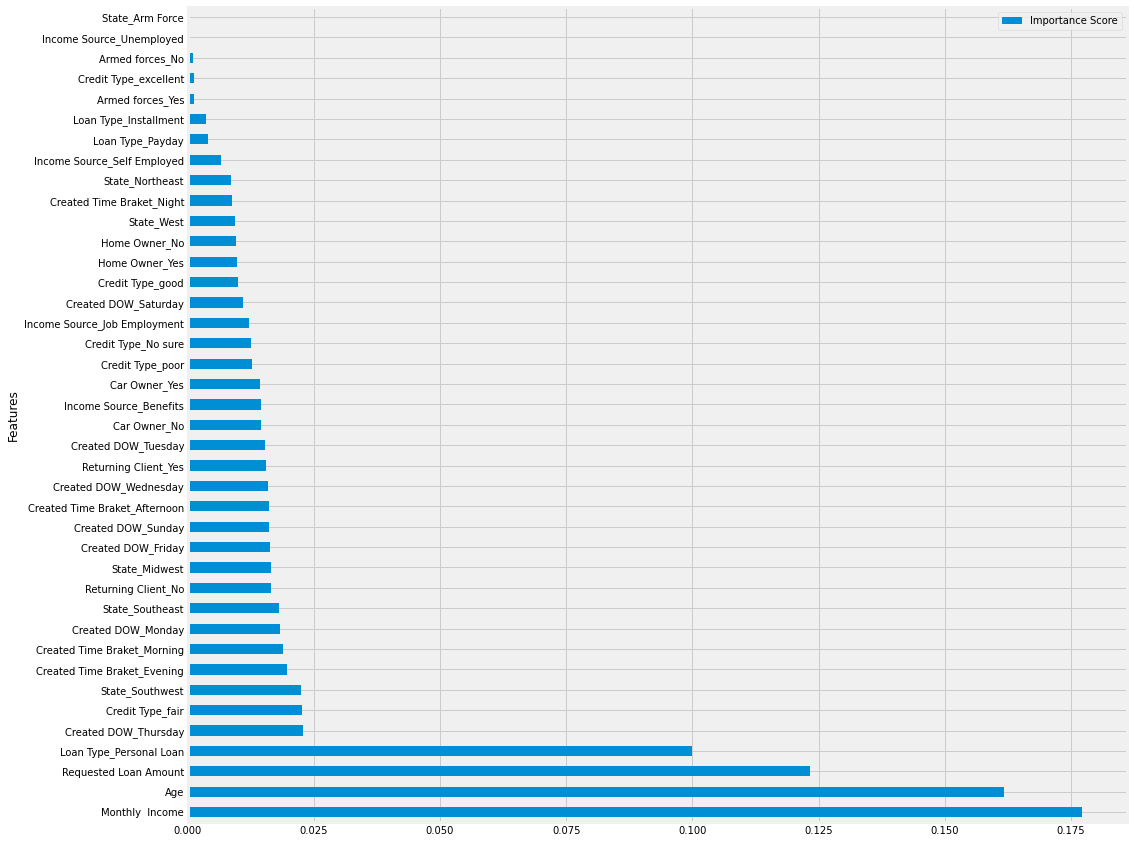

In [107]:
df2 = df_fea_impor_rf.groupby('Features').mean().sort_values(['Importance Score'],ascending=False).plot(kind='barh', figsize=(15,15))

## ROC Curve for all models

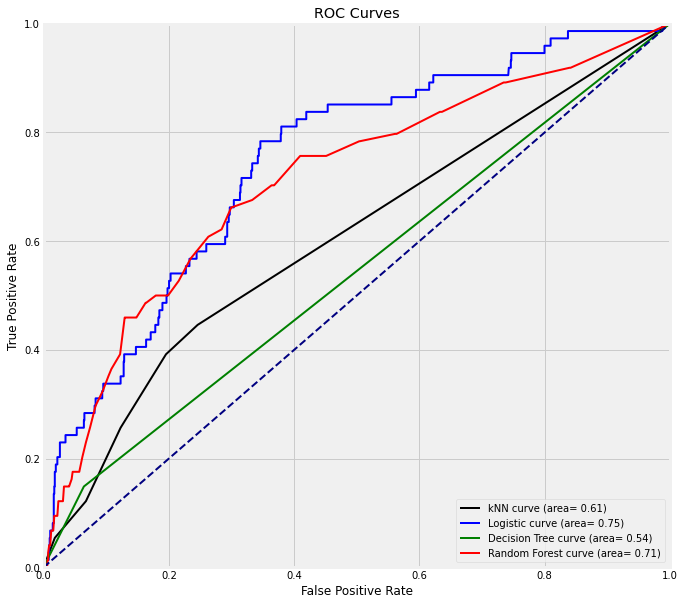

In [108]:
# all models ROC Curve comparison
plt.figure(figsize=(10,10))
lw = 2
plt.plot(knn_fpr, knn_tpr, color='black', lw=lw, 
         label='kNN curve (area= %0.2f)' %roc_auc_knn)
plt.plot(lr_fpr, lr_tpr, color='blue', lw=lw, 
         label='Logistic curve (area= %0.2f)' %roc_auc_lr)
plt.plot(dt_fpr, dt_tpr, color='green', lw=lw, 
         label='Decision Tree curve (area= %0.2f)' %roc_auc_dt)
plt.plot(rf_fpr, rf_tpr, color='red', lw=lw, 
         label='Random Forest curve (area= %0.2f)' %roc_auc_rf)

plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right');

# TEST SCORE for Logistic Regression

In [134]:
##Split the data 60 - 20 - 20 train/val/test

#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

scaler = StandardScaler()
X_s = scaler.fit_transform(X_train_val)
X_test_s = scaler.transform(X_test)

In [135]:
lr.fit(X_s, y_train_val)
lr_pred = lr.predict(X_test_s)

lr_ac = lr.score(X_test_s, y_test)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lr_y_score = lr.predict_proba(X_test_s)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
print('Logistic Regression TEST metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC_AUC: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1,
        roc_auc_lr)
     )

Logistic Regression TEST metrics: 
 Accuracy: 0.9355 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000 
 ROC_AUC: 0.7527


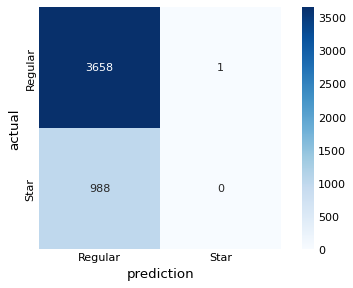

In [137]:
make_confusion_matrix(lr)

## Precision & Recall & Fidnig the reasonable Threshold 

In [ ]:
#lr_f1 = f1_score(y_test, lr_pred)

In [125]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = lr.predict(X_test_s)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},  F1: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict),f1_score(y_test, y_predict)))

Default threshold:
Precision: 0.0000,   Recall: 0.0000,  F1: 0.0000


/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
# using the new threshold of 0.06
y_predict = (lr.predict_proba(X_test_s)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f},  F1: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict),f1_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.1326,   Recall: 0.6786,  F1: 0.2218


In [127]:
# using the new threshold of 0.1
y_predict = (lr.predict_proba(X_test_s)[:,1] > 0.1)
print("Threshold of 0.1:")
print("Precision: {:6.4f},   Recall: {:6.4f},  F1: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict),f1_score(y_test, y_predict)))

Threshold of 0.1:
Precision: 0.1667,   Recall: 0.5476,  F1: 0.2556


In [133]:
# using the new threshold of 0.14
y_predict = (lr.predict_proba(X_test_s)[:,1] > 0.14)
print("Threshold of 0.14:")
print("Precision: {:6.4f},   Recall: {:6.4f},  F1: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict),f1_score(y_test, y_predict)))

Threshold of 0.14:
Precision: 0.1977,   Recall: 0.4167,  F1: 0.2682


In [129]:
# using the new threshold of 0.17
y_predict = (lr.predict_proba(X_test_s)[:,1] > 0.17)
print("Threshold of 0.17:")
print("Precision: {:6.4f},   Recall: {:6.4f},  F1: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict),f1_score(y_test, y_predict)))

Threshold of 0.17:
Precision: 0.2137,   Recall: 0.2976,  F1: 0.2488


In [128]:
# using the new threshold of 0.2
y_predict = (lr.predict_proba(X_test_s)[:,1] > 0.2)
print("Threshold of 0.2:")
print("Precision: {:6.4f},   Recall: {:6.4f},  F1: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict),f1_score(y_test, y_predict)))

Threshold of 0.2:
Precision: 0.2051,   Recall: 0.1905,  F1: 0.1975


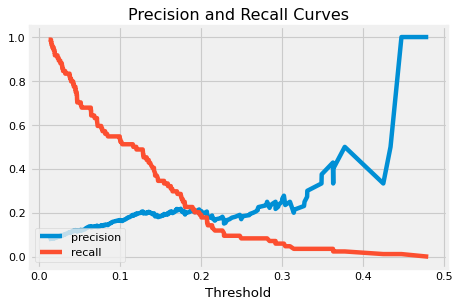

In [132]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr.predict_proba(X_test_s)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

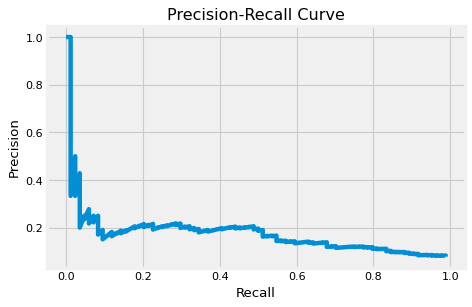

In [120]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [ ]:
threshold = []
for x in 

## XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier()
xg.fit(X_tr_rs, y_tr_rs)
xg_pred = xg.predict(X_tr_val)

xg_ac = xg.score(X_tr_val, y_val)
xg_precision = precision_score(y_val, xg_pred)
xg_recall = recall_score(y_val, xg_pred)
xg_f1 = f1_score(y_val, xg_pred)

xg_y_score = xg.predict_proba(X_tr_val)[:, 1]
xg_fpr, xg_tpr, auc_thresholds = roc_curve(y_val, xg_y_score)
roc_auc_xg = auc(xg_fpr, xg_tpr)

print(classification_report(y_val, xg_pred))

In [ ]:

print('XGBoost validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xg_ac, 
         xg_precision, 
         xg_recall,
         xg_f1,
         roc_auc_xg)
     )

In [ ]:
confusion_matrix(y_val, xg_pred)

In [ ]:
plt.plot(xg_fpr, xg_tpr, color='pink', lw=lw,
        label='XGBoost curve (area= %0.2f)' %roc_auc_xg)

## ROC Curve

In [ ]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_te)[:,1])

In [ ]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_te)[:,1]))

In [ ]:
#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)


def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
decisiontree = DecisionTreeClassifier(max_depth=4)
quick_test_afew_times(decisiontree, X_tr_rs, y_tr_rs)

In [ ]:
randomforest = RandomForestClassifier(n_estimators=100)
quick_test_afew_times(randomforest, X_tr_rs, y_tr_rs)